In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras

import pathlib
import time
AUTOTUNE = tf.data.AUTOTUNE

from tf_augmentation import ds_augment
from get_model import *
from utils import *

In [2]:
data_dir = pathlib.Path("C:/Users/AORUS/dataset")

In [3]:
REPEAT_TIMES = 20
SHUFFLE_BUFFER = 1000
BATCH_SIZE = 64
IMG_SIZE = 96

In [4]:
train_ds : tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
)
val_ds : tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
)
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(f"num: {num_classes}")
train_ds_ = train_ds.cache(str(data_dir / "train_ds")).unbatch().repeat(REPEAT_TIMES).shuffle(SHUFFLE_BUFFER, reshuffle_each_iteration=True)
val_ds_ = val_ds.cache(str(data_dir / "val_ds")).unbatch().repeat(max(1, REPEAT_TIMES // 4)).shuffle(SHUFFLE_BUFFER, reshuffle_each_iteration=True)

train_ds = ds_augment(train_ds_).batch(BATCH_SIZE, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
val_ds = ds_augment(val_ds_).batch(BATCH_SIZE, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

Found 2369 files belonging to 15 classes.
Found 2369 files belonging to 15 classes.
['apple', 'banana', 'bus', 'car', 'cat', 'cow', 'dog', 'durian', 'grape', 'horse', 'orange', 'pig', 'plane', 'ship', 'train']
num: 15


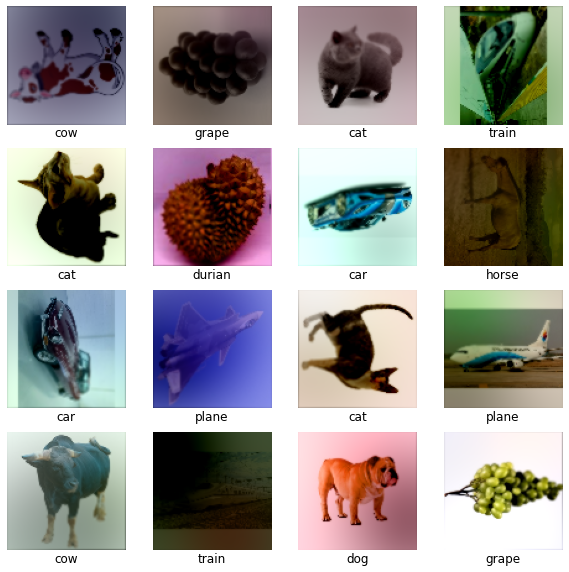

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255)
        plt.title(class_names[labels[i]], y=-0.15)
        plt.axis("off")

In [6]:
export_path = f"D:/SmartCar/TFLite_Smartcar/saved_models/{int(time.time())}"
print(export_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=export_path,
    save_best_only=True,
    monitor="val_loss",
    mode='min',
)

historyViewer = HistoryViewer()

D:/SmartCar/TFLite_Smartcar/saved_models/1653269517


In [7]:
base_model, model = get_EfficientNetV2B1(IMG_SIZE, num_classes, trainable=False)
model.summary()

Model: "efficientnetv2-b1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 efficientnetv2-b1 (Function  (None, 3, 3, 1280)       6931124   
 al)                                                             
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 6,950,339
Trainable params: 19,215


In [8]:
FREEZE_EPOCHS = 10
UNFREEZE_EPOCHS = 10

FREEZE_LR = 1e-4
UNFREEZE_LR = 1e-5

Epoch 1/10
    741/Unknown - 34s 35ms/step - loss: 1.4985 - accuracy: 0.5968

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 86s 105ms/step - loss: 1.4985 - accuracy: 0.5968 - val_loss: 0.8245 - val_accuracy: 0.8008
Epoch 2/10
740/741 [============================>.] - ETA: 0s - loss: 0.7346 - accuracy: 0.8014

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 145s 195ms/step - loss: 0.7345 - accuracy: 0.8014 - val_loss: 0.5690 - val_accuracy: 0.8474
Epoch 3/10
740/741 [============================>.] - ETA: 0s - loss: 0.5745 - accuracy: 0.8312

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 139s 187ms/step - loss: 0.5745 - accuracy: 0.8312 - val_loss: 0.4639 - val_accuracy: 0.8686
Epoch 4/10
740/741 [============================>.] - ETA: 0s - loss: 0.5006 - accuracy: 0.8463

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 160s 215ms/step - loss: 0.5006 - accuracy: 0.8463 - val_loss: 0.4122 - val_accuracy: 0.8753
Epoch 5/10
740/741 [============================>.] - ETA: 0s - loss: 0.4527 - accuracy: 0.8582

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 181s 244ms/step - loss: 0.4528 - accuracy: 0.8582 - val_loss: 0.3784 - val_accuracy: 0.8871
Epoch 6/10
740/741 [============================>.] - ETA: 0s - loss: 0.4260 - accuracy: 0.8629

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 184s 248ms/step - loss: 0.4260 - accuracy: 0.8629 - val_loss: 0.3547 - val_accuracy: 0.8894
Epoch 7/10
740/741 [============================>.] - ETA: 0s - loss: 0.3999 - accuracy: 0.8707

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 189s 254ms/step - loss: 0.3999 - accuracy: 0.8707 - val_loss: 0.3352 - val_accuracy: 0.8940
Epoch 8/10
740/741 [============================>.] - ETA: 0s - loss: 0.3923 - accuracy: 0.8715

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 211s 284ms/step - loss: 0.3923 - accuracy: 0.8714 - val_loss: 0.3168 - val_accuracy: 0.8990
Epoch 9/10
740/741 [============================>.] - ETA: 0s - loss: 0.3736 - accuracy: 0.8774

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 223s 301ms/step - loss: 0.3735 - accuracy: 0.8774 - val_loss: 0.3154 - val_accuracy: 0.9017
Epoch 10/10
740/741 [============================>.] - ETA: 0s - loss: 0.3623 - accuracy: 0.8791

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 240s 324ms/step - loss: 0.3624 - accuracy: 0.8790 - val_loss: 0.2925 - val_accuracy: 0.9092


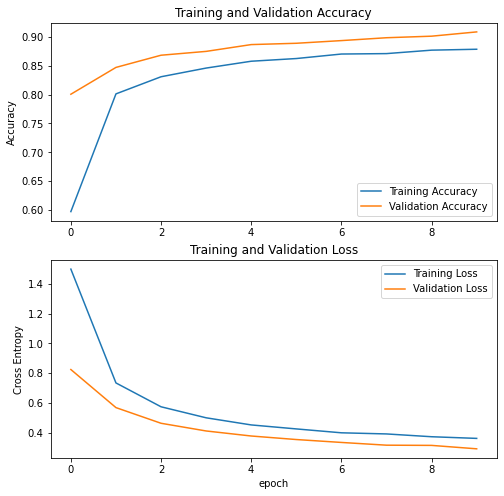

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=FREEZE_LR),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    initial_epoch=0,
    epochs=FREEZE_EPOCHS,
    validation_data=val_ds,
    callbacks=[model_checkpoint_callback],
)
historyViewer.update(history)
historyViewer.show()

In [10]:
base_model.trainable = True
model.summary()

Model: "efficientnetv2-b1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 efficientnetv2-b1 (Function  (None, 3, 3, 1280)       6931124   
 al)                                                             
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 6,950,339
Trainable params: 6,879,2

Epoch 11/20
    741/Unknown - 151s 182ms/step - loss: 0.2964 - accuracy: 0.8985

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 226s 283ms/step - loss: 0.2964 - accuracy: 0.8985 - val_loss: 0.1805 - val_accuracy: 0.9417
Epoch 12/20
741/741 [==============================] - ETA: 0s - loss: 0.2438 - accuracy: 0.9163

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 234s 315ms/step - loss: 0.2438 - accuracy: 0.9163 - val_loss: 0.1485 - val_accuracy: 0.9506
Epoch 13/20
741/741 [==============================] - ETA: 0s - loss: 0.2095 - accuracy: 0.9286

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 268s 361ms/step - loss: 0.2095 - accuracy: 0.9286 - val_loss: 0.1313 - val_accuracy: 0.9581
Epoch 14/20
741/741 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9357

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 287s 387ms/step - loss: 0.1869 - accuracy: 0.9357 - val_loss: 0.1075 - val_accuracy: 0.9640
Epoch 15/20
741/741 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9438

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 287s 387ms/step - loss: 0.1638 - accuracy: 0.9438 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 16/20
741/741 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9505

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 334s 449ms/step - loss: 0.1445 - accuracy: 0.9505 - val_loss: 0.0821 - val_accuracy: 0.9755
Epoch 17/20
741/741 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9555

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 332s 447ms/step - loss: 0.1317 - accuracy: 0.9555 - val_loss: 0.0741 - val_accuracy: 0.9778
Epoch 18/20
741/741 [==============================] - ETA: 0s - loss: 0.1187 - accuracy: 0.9600

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 337s 454ms/step - loss: 0.1187 - accuracy: 0.9600 - val_loss: 0.0617 - val_accuracy: 0.9804
Epoch 19/20
741/741 [==============================] - 300s 404ms/step - loss: 0.1108 - accuracy: 0.9626 - val_loss: 0.0624 - val_accuracy: 0.9794
Epoch 20/20
741/741 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9654

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models\1653269517\assets


741/741 [==============================] - 335s 451ms/step - loss: 0.1048 - accuracy: 0.9654 - val_loss: 0.0606 - val_accuracy: 0.9813


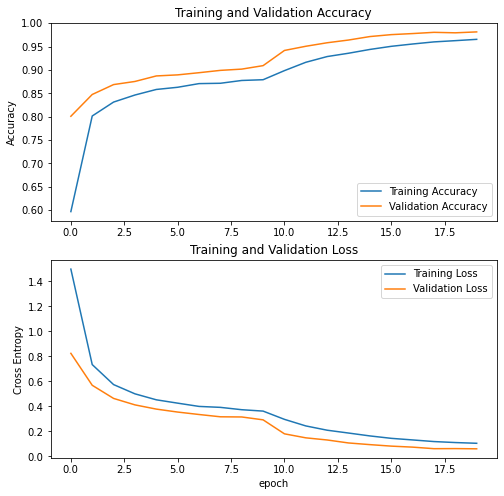

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=UNFREEZE_LR),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    initial_epoch=FREEZE_EPOCHS,
    epochs=FREEZE_EPOCHS+UNFREEZE_EPOCHS,
    validation_data=val_ds,
    callbacks=[model_checkpoint_callback],
)
historyViewer.update(history)
historyViewer.show()